In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random

In [2]:
xor_df = pd.read_csv('xor.csv')
xor_df

,X1,X2,Target
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [3]:
def sigmoid(vals):
    return (1 + np.exp(-vals)) ** -1

sigmoid = np.vectorize(sigmoid)

In [4]:
def feedForward(input, weights):
    H = np.dot(weights, input)

    return sigmoid(H)

In [5]:
def calcOutError(predicted, target):
    return (predicted - target) * predicted * (1 - predicted)

In [6]:
def calcHiddenError(hidden_out, output_weights, outError):
    return (hidden_out * (1 - hidden_out) * (np.dot(output_weights.T, outError)))[1:]

In [7]:
def updateWeights(node_weights, eta, error, node_out):
    new_weights = node_weights.copy()
    
    for i, weight_row in enumerate(new_weights):
        for j, weight in enumerate(weight_row):
            weight -= eta * error[i] * node_out.T[0][j]
            new_weights[i][j] = weight

    return new_weights

In [8]:
X = (np.array(xor_df)[:, 0:-1]).T
T = np.array(xor_df)[:, -1]
T = (T.reshape(T.shape[0], 1)).T

print(X, X.shape)
print(T, T.shape)

[[0 0 1 1]
 [0 1 0 1]] (2, 4)
[[0 1 1 0]] (1, 4)


In [9]:
num_hidden = 2
num_out = 1

In [10]:
X_in = np.r_[ np.ones((1, X.shape[1])), X]
print(X_in, X_in.shape)

[[1. 1. 1. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]] (3, 4)


In [11]:
input_weights = np.random.random((num_hidden, X_in.shape[0]))
output_weights = np.random.random((num_out, num_hidden + 1)) # +1 for bias

print(input_weights, input_weights.shape)
print('---')
print(output_weights, output_weights.shape)

[[0.42557968 0.55064936 0.25365143]
 [0.66407173 0.65922517 0.1286163 ]] (2, 3)
---
[[0.50722812 0.08818432 0.81650324]] (1, 3)


In [12]:
epochs = 20000
eta = 0.05
errors = []
for epoch in range(epochs):
    for i, X_row in enumerate(X_in.T):
        # FEED FORWARD PHASE
        X_row = X_row.reshape(X_row.shape[0], 1)
        A = feedForward(X_row, input_weights)

        # Add bias to A matrix
        A_in = np.r_[np.ones((1, A.shape[1])), A]
        Y = feedForward(A_in, output_weights)

        #Calculating error at each node
        delO = calcOutError(Y, T[0][i])
        delH = calcHiddenError(A_in, output_weights, delO)

        #Tracking output node error for each epoch
        errors.append(delO[0][0])

        # Update weights
        output_weights = updateWeights(output_weights, eta, delO, A_in)
        input_weights = updateWeights(input_weights, eta, delH, X_row)

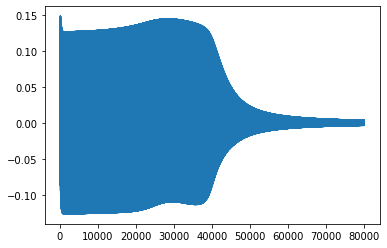

In [13]:
plt.plot([epoch for epoch in range(epochs * X_in.shape[1])], errors)

In [14]:
print(output_weights)
print(input_weights)

[[-3.27260049 -8.02698073  7.34464417]]
[[-5.43960921  3.57768328  3.53828877]
 [-2.41835285  5.97140921  5.75118975]]


In [15]:
pred = []

for i, X_row in enumerate(X_in.T):
    # FEED FORWARD PHASE
    X_row = X_row.reshape(X_row.shape[0], 1)
    A = feedForward(X_row, input_weights)

    # Add bias to A matrix
    A_in = np.r_[np.ones((1, A.shape[1])), A]
    Y = feedForward(A_in, output_weights)

    pred.append(Y)

print("Target: ", T)
print("Predicted: ", [1 if y >= 0.5 else 0 for y in pred])


Target:  [[0 1 1 0]]
Predicted:  [0, 1, 1, 0]
